In [144]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [145]:
style.use("ggplot")
data = pd.read_csv("student-mat.csv", sep=";")

predict = "G3"

data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
data = shuffle(data) # Optional - shuffle the data


In [146]:

x = data.drop(columns=[predict]).to_numpy()
y = data[predict].to_numpy()

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)


In [147]:

# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
best = 0
for _ in range(70):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.8357579436615479
Accuracy: 0.7900500627677471
Accuracy: 0.8138453512777026
Accuracy: 0.8674317280495564
Accuracy: 0.7429305225930322
Accuracy: 0.7803748390766899
Accuracy: 0.860153219688707
Accuracy: 0.9158682689548516
Accuracy: 0.859490308153626
Accuracy: 0.8700296130754013
Accuracy: 0.860046672143248
Accuracy: 0.8838339165489751
Accuracy: 0.881023024094821
Accuracy: 0.8031049364262829
Accuracy: 0.9186345477354501
Accuracy: 0.9225767224789891
Accuracy: 0.8914260158472762
Accuracy: 0.8644822296948251
Accuracy: 0.9541565050719534
Accuracy: 0.7852966759453641
Accuracy: 0.8690795576467338
Accuracy: 0.8819602362525187
Accuracy: 0.8958973927928642
Accuracy: 0.9051655168085332
Accuracy: 0.9079944830427996
Accuracy: 0.831551903486891
Accuracy: 0.8616367362074824
Accuracy: 0.7476364403722755
Accuracy: 0.8831999870069732
Accuracy: 0.7443403502805628
Accuracy: 0.9107034895545775
Accuracy: 0.5818401297609668
Accuracy: 0.8556001218198908
Accuracy: 0.8640023408866342
Accuracy: 0.8350071

In [148]:
# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)


In [149]:

print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print("-------------------------")

-------------------------
Coefficient: 
 [ 0.15074829  0.98242143  0.03641179 -0.2407315  -0.2015312 ]
Intercept: 
 -1.4836994915588537
-------------------------


In [150]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])


7.469890217333528 [8 8 8 0 2] 6
10.466336986650884 [11 11  8  0  4] 10
8.826631812643214 [10  9 10  0  2] 10
8.731767559444654 [9 9 6 0 1] 10
8.775848903829965 [11  9 10  0  3] 10
10.088509154754341 [11 10  8  0  1] 10
15.032859244894299 [14 15  2  0  2] 15
8.059451507600203 [10  9  0  0  4] 0
10.125860189060266 [ 8 11  0  0  2] 11
10.06393577808066 [10 10 17  0  2] 10
15.642589694315875 [16 15 16  0  3] 15
10.500180352453167 [10 11  2  0  2] 11
8.233840906232603 [8 9 2 0 2] 10
13.415194743079285 [14 13  6  0  1] 13
4.075482177184373 [6 5 4 0 2] 6
19.344975796931507 [18 18 24  1  1] 18
-0.7807409444046043 [6 0 0 0 1] 0
13.826865940778113 [13 14  0  0  2] 15
11.82817971114226 [14 12  6  0  4] 13
8.452311649250312 [8 9 8 0 2] 10
5.709610333093792 [7 7 4 2 2] 9
10.037726245941094 [12 10  8  0  2] 11
9.590582501542288 [10 10  4  0  2] 10
8.311765616420198 [9 9 0 0 2] 10
13.068016381060731 [14 13  2  0  2] 13
11.015046548676185 [11 11 12  0  2] 11
8.457412778432005 [9 9 4 0 2] 10
6.19617446

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


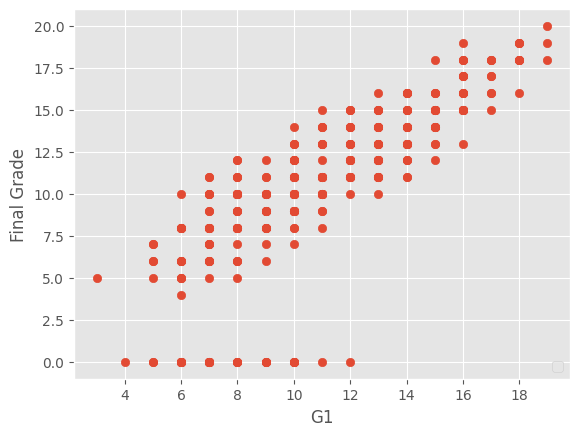

In [151]:
# Drawing and plotting model
plot = "G1"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()